In [29]:
# Obtiene los datos de precipitación par la Cuenca del Valle
# de Méxco a partir de CHIRPS y los promedia espacialmente.

import os

import rioxarray

import pandas as pd
import numpy as np
import matplotlib

import geopandas as gpd
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Permite ajustar los valores de todas las gráficas
#params = {"ytick.color" : "w",
#          "xtick.color" : "w",
#          "axes.labelcolor" : "w",
#          "axes.edgecolor" : "w",
#          "text.color": "w"}
#plt.rcParams.update(params)

In [30]:
path_nc = "../results/CHIRPS_global_days_p05/cuenca_valle_mexico/"
path_shp = "../data/Cuencas/Regiones_Hidrologicas_Administrativas/"
names = ["cuenca_valle_mexico_chirps-v2.0.days_p05.nc", 
    "cuenca_valle_mexico_chirps-v2.0.2021.days_p05.nc",
    "rha250kgw.shp"]

path_d = "../results/onset/"
path_r = "../results/onset/graficas/"

# Si no existe la carpeta, la crea.
if not os.path.exists(path_r):
    os.mkdir(path_r)

df_pre = pd.read_csv(path_d + "pre_daily_CHIRPS.csv", index_col = "time" )
df_pre.index = pd.to_datetime( df_pre.index )
df_pre = df_pre[ ~ ( (df_pre.index.month == 2) & (df_pre.index.day == 29) ) ]

df = df_pre.resample("M").sum()
df = df.groupby(df.index.month).mean()
tot = df.sum().values[0]

# Precipitación total.
print( f"Total: {tot}" )
# Parciales.
print("Junio, julio, agosto")
print( df[ df.index.isin( [6, 7, 8] ) ].sum().values[0] * 100 / tot )
print("Junio, julio, agosto, septiembre")
print( df[ df.index.isin( [6, 7, 8, 9] ) ].sum().values[0] * 100 / tot )
print("Noviembre, diciembre, enero, febrero")
print( df[ df.index.isin( [11, 12, 1, 2] ) ].sum().values[0] * 100 / tot )

Total: 656.004931373146
Junio, julio, agosto
53.77486072693841
Junio, julio, agosto, septiembre
70.56077026693565
Noviembre, diciembre, enero, febrero
6.512872093644958


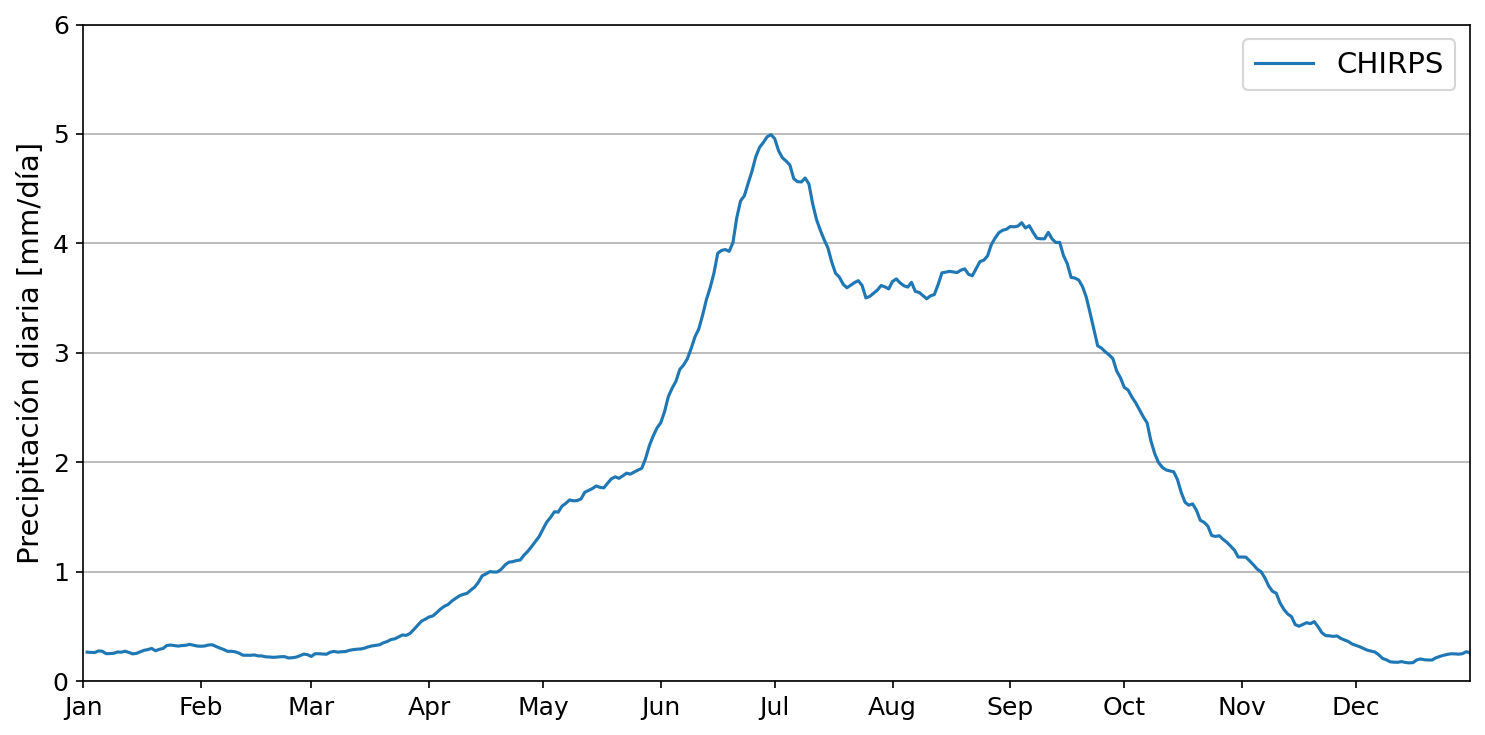

In [31]:
df_mean = df_pre.groupby(df_pre.index.dayofyear).mean()
df_mean.index = ( pd.to_datetime("2000-01-01") 
    + pd.to_timedelta(df_mean.index, "D") )

# Graficamos.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(10, 5)
fig.set_dpi(150)

ax.plot(df_mean)
ax.grid(axis = "y")
ax.set_ylabel("Precipitación diaria [mm/día]", fontsize = 14)
ax.tick_params(axis = "both", which = "major", labelsize = 12)
ax.legend(["CHIRPS"], fontsize = 14)
ax.set_ylim(0, 6)
ax.set_xlim( pd.to_datetime("2000-01-01"), pd.to_datetime("2000-12-31") )
# Formato de fecha.
ax.xaxis.set_major_locator( mdates.MonthLocator() )
ax.xaxis.set_major_formatter( mdates.DateFormatter("%b") )

# Separación adecuada entre gráficas.
fig.tight_layout()

fig.savefig( path_r + "pre_mean_cuenca_CHIRPS.png", bbox_inches = "tight" )

Onset     : 05 June
Withdrawal: 14 October


/var/folders/td/smccb02154l21rhgckcmbs940000gn/T/ipykernel_6630/940826977.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels( ["Jan", "", "Mar", "", "May", "",


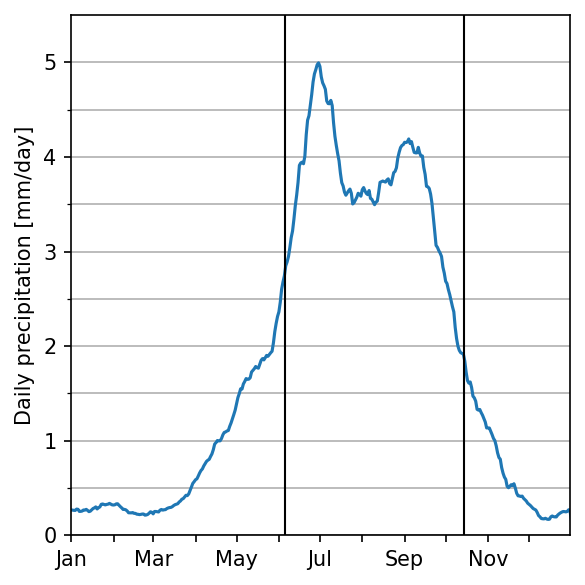

In [33]:
# Cargamos el archivo y ajustamos formatos.
date = pd.read_csv(path_d + "onset_CHIRPS.csv", index_col = "Año" )
date.index = pd.RangeIndex(date.index[0], date.index[-1] + 1, name = "Año" )
date.iloc[:, 0] = pd.to_datetime( date.iloc[:, 0] )
date.iloc[:, 1] = pd.to_datetime( date.iloc[:, 1] )

# Convertimos a día juliano.
date.iloc[:, 0] = date.iloc[:, 0].apply(lambda x: x.dayofyear)
date.iloc[:, 1] = date.iloc[:, 1].apply(lambda x: x.dayofyear)
# Ajustamos los años bisiestos.
date.iloc[date.index % 4 == 0, 0:2] = date.iloc[date.index % 4 == 0, 0:2] - 1

# Reconvertimos a fecha.
date.iloc[:, 0] = ( pd.to_datetime("2000-01-01")
    + pd.to_timedelta(date.iloc[:, 0], "D") )
date.iloc[:, 1] = ( pd.to_datetime("2000-01-01")
    + pd.to_timedelta(date.iloc[:, 1], "D") )

# Fechas.
onset = date.iloc[:, 0].mean()
withdrawal = date.iloc[:, 1].mean()

print( f"Onset     : {onset.day:02d}" + f" {onset.month_name()}" )
print( f"Withdrawal: {withdrawal.day:02d}" + f" {withdrawal.month_name()}" )

# Graficamos.
fig, ax = plt.subplots()
fig.set_facecolor("w")
fig.set_size_inches(4, 4)
fig.set_dpi(150)

# Curva suavizada.
ax.plot(df_mean)

# Onset y withdrawal.
ax.plot( (onset, onset), (0, 6), color = "k", linewidth = 1 )
ax.plot( (withdrawal, withdrawal), (0, 6), color = "k", linewidth = 1 )

ax.grid(axis = "y", which = "both")
ax.set_yticks(np.arange(0, 6, 1))
ax.set_yticks(np.arange(0, 5.5, 0.5), minor = True)
ax.set_ylabel("Daily precipitation [mm/day]")
#ax.set_xlabel("Month")
ax.set_ylim(0, 5.5)
ax.set_xlim( pd.to_datetime("2000-01-01"),
    pd.to_datetime("2000-12-31") )
ax.set_title("")
# Formato de fecha.
ax.xaxis.set_major_locator(mdates.MonthLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax.set_xticklabels( ["Jan", "", "Mar", "", "May", "",
    "Jul", "", "Sep", "", "Nov", ""] )

# Separación adecuada entre gráficas.
fig.tight_layout()

fig.savefig(path_r + "pre_ind_cuenca_CHIRPS.eps", bbox_inches = "tight")
